In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("benin-malanville.csv")
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [3]:
# Basic summary of numeric columns
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [4]:
# Count of missing values per column
missing = df.isna().sum()
missing[missing > 0]

Comments    525600
dtype: int64

In [5]:
# Columns with >5% missing values
threshold = 0.05 * len(df)
missing[missing > threshold]


Comments    525600
dtype: int64

In [6]:
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Z-score calculation
z_scores = df[cols_to_check].apply(zscore)
outliers = (z_scores.abs() > 3)

# Flag rows with any outlier
df['outlier_flag'] = outliers.any(axis=1)

# Clean: impute missing values in key columns using median
df_clean = df.copy()
df_clean[cols_to_check] = df_clean[cols_to_check].fillna(df_clean[cols_to_check].median())


In [8]:
df_clean.to_csv("data/benin-malanville_clean.csv", index=False)


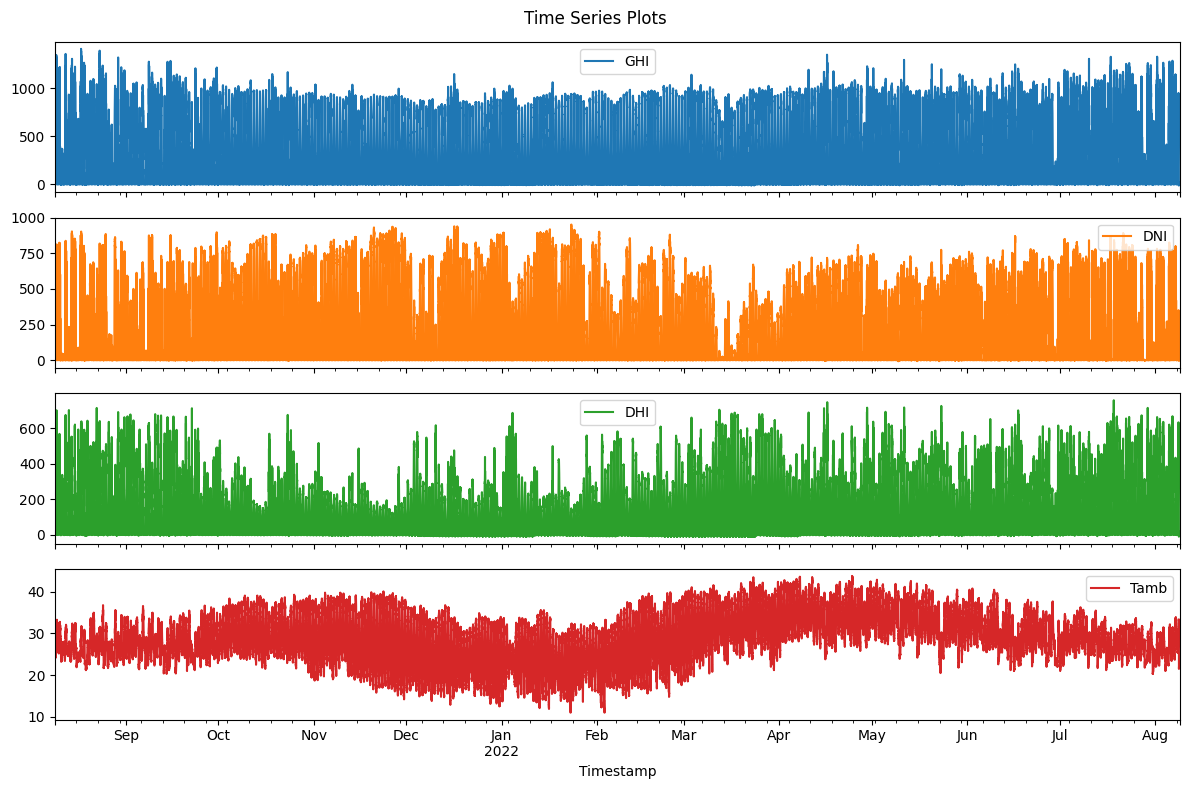

In [9]:
# Convert timestamp column
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Plot time series of GHI, DNI, DHI, Tamb
ts_cols = ['GHI', 'DNI', 'DHI', 'Tamb']

df_clean.set_index('Timestamp')[ts_cols].plot(subplots=True, figsize=(12, 8), title="Time Series Plots")
plt.tight_layout()
plt.show()


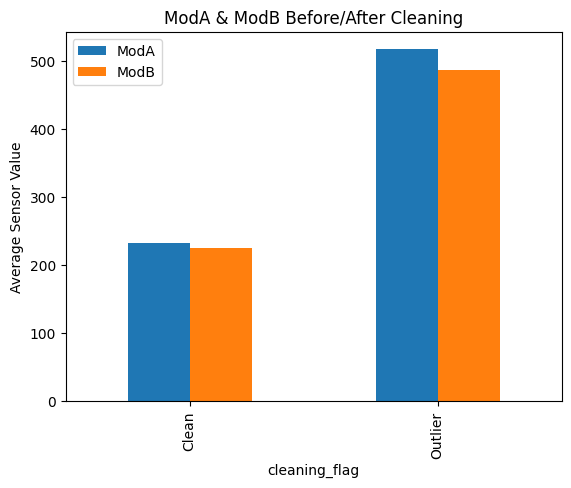

In [10]:
df_clean['cleaning_flag'] = df['outlier_flag']

df_clean.groupby('cleaning_flag')[['ModA', 'ModB']].mean().plot(kind='bar', title='ModA & ModB Before/After Cleaning')
plt.xticks([0,1], ['Clean', 'Outlier'])
plt.ylabel("Average Sensor Value")
plt.show()


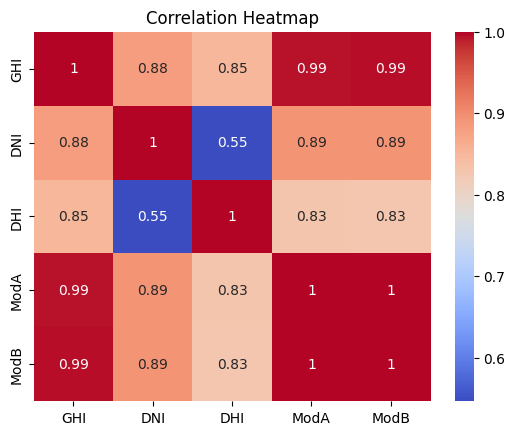

In [11]:
corr_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


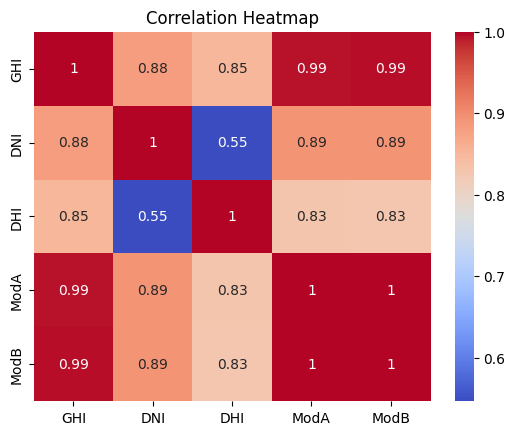

In [12]:
corr_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


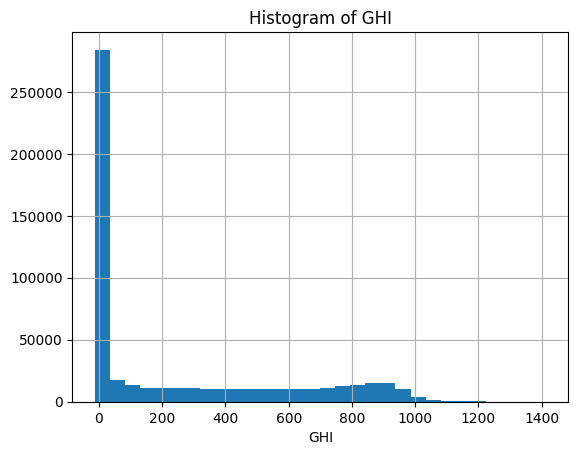

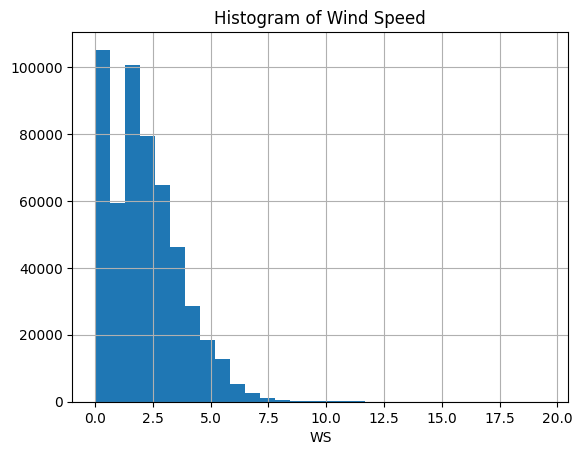

In [13]:
# Histograms
df_clean['GHI'].hist(bins=30)
plt.title('Histogram of GHI')
plt.xlabel('GHI')
plt.show()

df_clean['WS'].hist(bins=30)
plt.title('Histogram of Wind Speed')
plt.xlabel('WS')
plt.show()


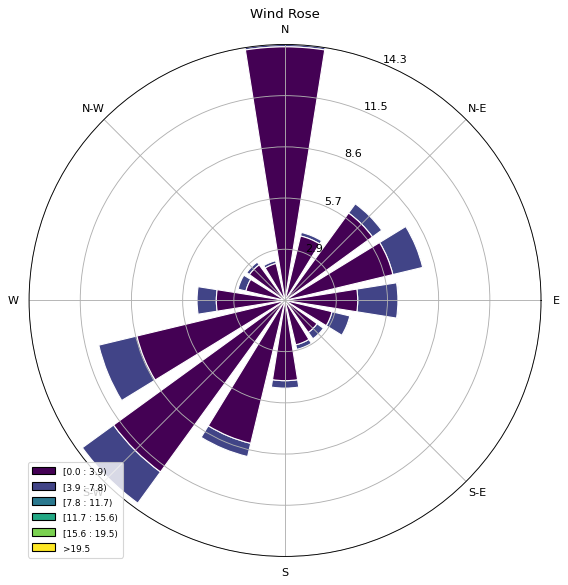

In [14]:
#optional 
try:
    from windrose import WindroseAxes

    ax = WindroseAxes.from_ax()
    ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()
    plt.title("Wind Rose")
    plt.show()
except:
    print("Windrose plot skipped. Install 'windrose' library if needed.")


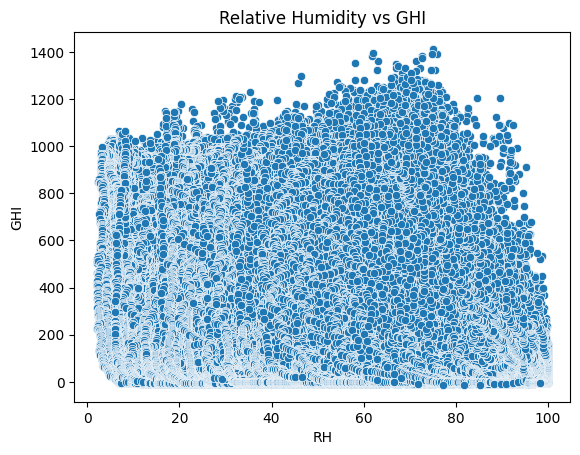

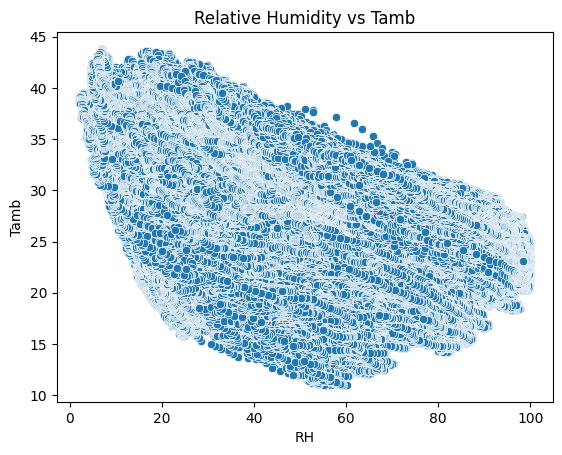

In [15]:
sns.scatterplot(data=df_clean, x='RH', y='GHI')
plt.title("Relative Humidity vs GHI")
plt.show()

sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.title("Relative Humidity vs Tamb")
plt.show()


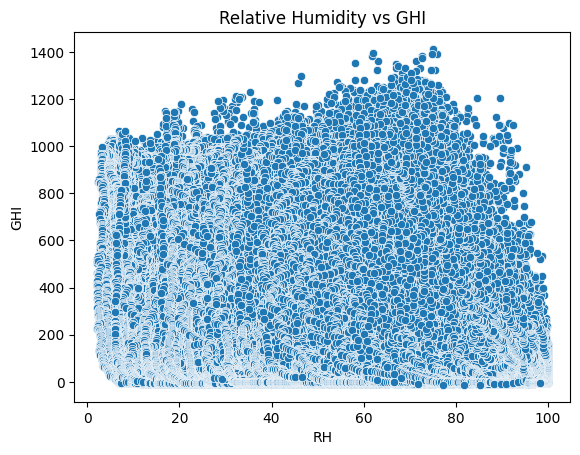

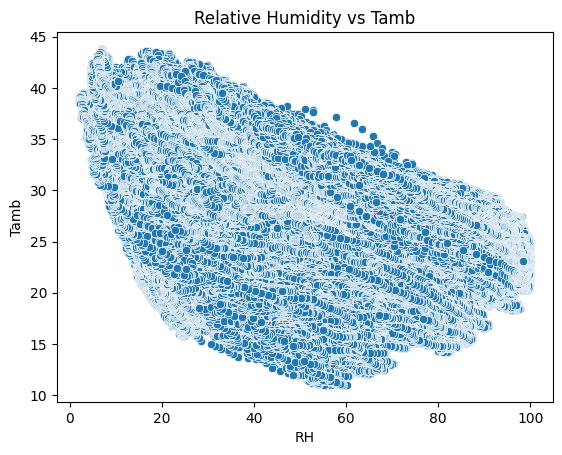

In [16]:
sns.scatterplot(data=df_clean, x='RH', y='GHI')
plt.title("Relative Humidity vs GHI")
plt.show()

sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.title("Relative Humidity vs Tamb")
plt.show()
